In [1]:
!pip install --upgrade scikit-image #upgrade to v0.17.x
!git clone https://github.com/zamriibr/cvs_example #clone samples

     |████████████████████████████████| 29.2MB 142kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
Cloning into 'cvs_example'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Morphological Filtering


Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image, such as boundaries, skeletons, etc. In any given technique, we probe an image with a small shape or template called a structuring element, which defines the region of interest or neighborhood around a pixel.

In this document we outline the following basic morphological operations:

* Erosion
* Dilation
* Opening
* Closing
* Skeletonize
* Convex Hull

To get started, let’s load an image using io.imread. Note that morphology functions only work on gray-scale or binary images, so we set as_gray=True.

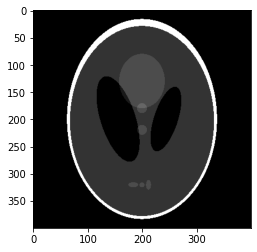

In [3]:
from skimage import data
from skimage.util import img_as_ubyte
from skimage import io

orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray);

Let’s also define a convenience function for plotting comparisons:

In [4]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

## Erosion


Morphological erosion sets a pixel at (i, j) to the minimum over all pixels in the neighborhood centered at (i, j). The structuring element, selem, passed to erosion is a boolean array that describes this neighborhood. Below, we use disk to create a circular structuring element, which we use for most of the following examples.

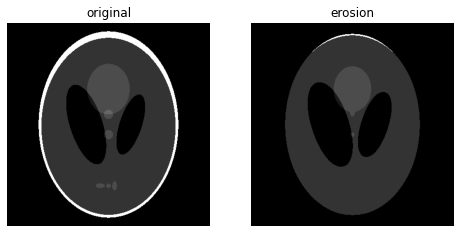

In [5]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(5)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')

Notice how the white boundary of the image disappears or gets eroded as we
**increase the size of the disk**. Also notice the increase in size of the two black ellipses in the center and the disappearance of the 3 light grey patches in the lower part of the image.

## Dilation

Morphological dilation sets a pixel at (i, j) to the maximum over all pixels in the neighborhood centered at (i, j). Dilation enlarges bright regions and shrinks dark regions.

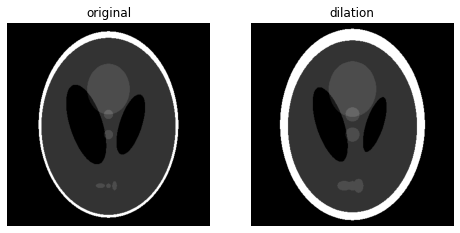

In [6]:
dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')

Notice how the white boundary of the image thickens, or gets dilated, as we increase the size of the disk. Also notice the decrease in size of the two black ellipses in the centre, and the thickening of the light grey circle in the center and the 3 patches in the lower part of the image.



## Question 1: Student 3 (please answer on google form)

1. Search any image from internet or your own picture (capture using phone)
2. Use dilation/erosion to improve the quality of the image. 

a. Why you choose that image ? What problem appear on that image ? 

b. Discuss the techniques that you used to improve the quality of the image. 

Upload the result to google form. (Image subplot before and after enhancement)

---

## Opening

Morphological opening on an image is defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks.

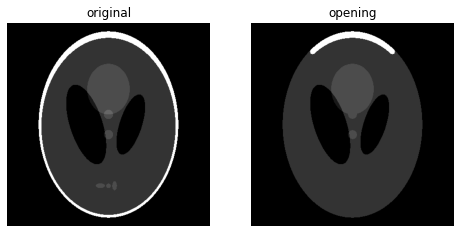

In [7]:
opened = opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened, 'opening')


Since opening an image starts with an erosion operation, light regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that light regions that are larger than the structuring element retain their original size. Notice how the light and dark shapes in the center their original thickness but the 3 lighter patches in the bottom get completely eroded. The size dependence is highlighted by the outer white ring: The parts of the ring thinner than the structuring element were completely erased, while the thicker region at the top retains its original thickness.

## Closing

Morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.

To illustrate this more clearly, let’s add a small crack to the white border:

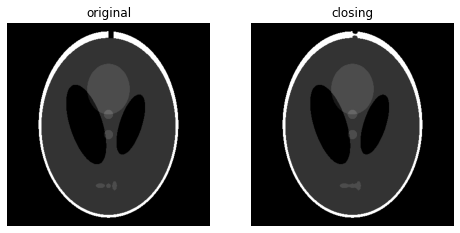

In [8]:
phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, selem)
plot_comparison(phantom, closed, 'closing')

Since closing an image starts with an dilation operation, dark regions that are smaller than the structuring element are removed. The dilation operation that follows ensures that dark regions that are larger than the structuring element retain their original size. Notice how the white ellipses at the bottom get connected because of dilation, but other dark region retain their original sizes. Also notice how the crack we added is mostly removed.

## Question 2: Student 1 (please answer on google form)

1. Search any image from internet or your own picture (capture using phone)
2. Use opening/closing technique to improve the quality of the image. 

a. Why you choose that image ? What problem appear on that image ?
 
b. Discuss the techniques that you used to improve the quality of the image. 

Upload the result to google form. (Image subplot before and after enhancement)

---

# Advance topics: Skeletonize and Convex Hull

## Skeletonize

Thinning is used to reduce each connected component in a binary image to a single-pixel wide skeleton. It is important to note that this is performed on binary images only.

In [9]:
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage import color
from skimage import filters

img = img_as_float(io.imread("/content/birds_on_a_wire_1600.jpg"))

gray = color.rgb2gray(img)
my_gray = img @ [0.2126, 0.7152, 0.0722]
my_gray2 = img[:,:,0] * 0.2126 + img[:,:,1] * 0.7152 + img[:,:,2] * 0.0722

text_threshold0 = 200000
text_threshold1 = filters.threshold_otsu(my_gray2)
text_threshold2 = filters.threshold_sauvola(my_gray2)

new = my_gray2 < text_threshold1
lol = invert(new)

sk = skeletonize(lol == 0)
plot_comparison(lol, sk, 'skeletonize')

FileNotFoundError: ignored

As the name suggests, this technique is used to thin the image to 1-pixel wide skeleton by applying thinning successively.

## Convex hull

The convex_hull_image is the set of pixels included in the smallest convex polygon that surround all white pixels in the input image. Again note that this is also performed on binary images.

In [ ]:
hull1 = convex_hull_image(lol ==0)
plot_comparison(lol, hull1, 'convex hull')

## Question 3: Student 2 (please answer on google form)

1. Search any image from internet or your own picture (capture using phone)
2. Use skeleton/convex hull technique to extract information from image. 

a. Why you choose that image ? 

b. What kind of information can be extract from that image ?

Upload the result to google form. (Image subplot before and after enhancement)

---